# <center> House Valuation Model 
# <center > Shuting Lian
    
### For the house valuation,   I dived into house features engineering to find out meaningful features which are related to historical sold price. During this process, I conducted data preprocessing, data analysis and compared linear regression model without regularization, with Ridge regularized, Lasso regularized and ElasticNet regularized liner regression models. I divided the 70% of dataset for training and 30% for test. According to the RMSE(Root Mean Square Error)  on training and test set in different models, I finally chose the Ridge Linear Model for house valuation.

## 1.	Raw Data Overview 
### At the very beginning, I loaded data with json format and totally I got 21093 entities with 218 features.  




  

In [70]:
import nbconvert

In [71]:
import os,json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

att1 = json.load(open('1.attrs'))
train = pd.DataFrame.from_dict(att1, orient='index')


# this finds our json files
path_to_json = r'Scraper 2/scraped_data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.attrs')]


for js in json_files:
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        train_temp = pd.DataFrame(json_text).T
#         print(train_temp.shape)
        train=train.append(train_temp)

print("beginning shape",train.shape)









beginning shape (21093, 218)


### Then I found out features with null value, and remove those features with more than 95% missing values. Here we got 42 features.



In [72]:
#count null columns

null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

0                         21017
1                         20969
10                        20362
100                       21073
101                       21071
102                       21072
103                       21075
104                       21073
105                       21075
106                       21081
107                       21083
108                       21082
109                       21088
11                        20316
110                       21082
111                       21077
112                       21081
113                       21087
114                       21089
115                       21087
116                       21087
117                       21085
118                       21084
119                       21088
12                        20302
120                       21090
121                       21086
122                       21091
123                       21088
124                       21084
                          ...  
Flooring

In [73]:

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df_train = train.drop((missing_data[missing_data['Percent'] > 0.95]).index,1)
print(df_train.shape)




(21093, 42)


In [74]:
#drop samples with null sold price
df_train.dropna(axis=0,subset=['Sold Price'],inplace=True)
# total = df_train.isnull().sum().sort_values(ascending=False)
# percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)

df_train['Sold Price']= df_train['Sold Price'].str.strip('$')
df_train['Sold Price']= df_train['Sold Price'].str.replace(',', '')
print(df_train['Sold Price'])
df_train['Sold Price'] = df_train['Sold Price'].apply(pd.to_numeric)


## 2. Data Preprocessing
###  For house modeling, the target value is ‘Sold Price’. So I conducted the statistical calculation on it and implemented z-score normalization to make the data  distribution closely follow the diagonal that represents the normal distribution.


In [7]:
prices=df_train['Sold Price']
minimum_price = np.min(prices)
# Alternative using pandas
# minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(prices)
# Alternative using pandas
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
# Alternative using pandas
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)
# Alternative using pandas
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print ("Statistics for  housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))
print ("First quartile of prices: ${:,.2f}".format(first_quartile))
print ("Second quartile of prices: ${:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for  housing dataset:

Minimum price: $15,000.00
Maximum price: $4,525,000.00
Mean price: $490,992.74
Median price $430,000.00
Standard deviation of prices: $249,542.81
First quartile of prices: $353,000.00
Second quartile of prices: $550,500.00
Interquartile (IQR) of prices: $197,500.00



 mu = 490992.74 and sigma = 249542.81



Text(0.5,1,'SalePrice distribution')

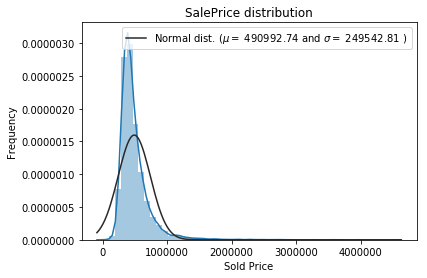

In [8]:

sns.distplot(df_train['Sold Price'],fit=norm);


(mu, sigma) = norm.fit(df_train['Sold Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

#Now plot the distribution
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(df_train['Sold Price'], plot=plt)
# plt.show()

In [9]:
#data standardlization
from scipy import stats
df_train=df_train[(np.abs(stats.zscore(df_train['Sold Price'])) < 2)]
print(df_train.shape)

(20330, 42)


In [10]:
prices=df_train['Sold Price']
minimum_price = np.min(prices)


# TODO: Maximum price of the data
maximum_price = np.max(prices)


# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)


# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
print ("Statistics for  housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))




Statistics for  housing dataset:

Minimum price: $15,000.00
Maximum price: $990,000.00
Mean price: $457,823.29
Median price $424,900.00
Standard deviation of prices: $151,692.62



 mu = 12.98 and sigma = 0.32



Text(0.5,1,'SalePrice distribution')

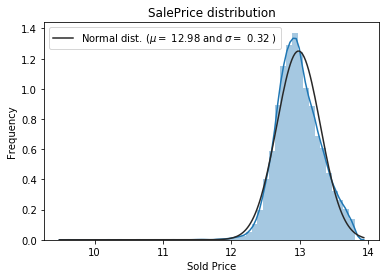

In [11]:

df_train['Sold Price'] = np.log1p(df_train['Sold Price'])
sns.distplot(df_train['Sold Price'],fit=norm);


(mu, sigma) = norm.fit(df_train['Sold Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

#Now plot the distribution
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(df_train['Sold Price'], plot=plt)
# plt.show()

####  Here I picked some numerical data for preprocessing.

In [12]:
df_train['List Price']= df_train['List Price'].str.strip('$')
df_train['List Price']= df_train['List Price'].str.replace(',','')
df_train['List Price'] = df_train['List Price'].apply(pd.to_numeric)
df_train[['Baths Full','Baths Half','Bedrms','Bedrms Above Grade','Beds Total']] = df_train[['Baths Full','Baths Half','Bedrms','Bedrms Above Grade','Beds Total']].apply(pd.to_numeric)

df_train.info()
# df_train.to_csv("housing.csv", encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
Index: 20330 entries, 10 BRIDLECREEK, Calgary, Alberta T2Y 3N7 to Hiwa 24 cross Bow River turn left RR252A go 2 kil., Rural Wheatland County, Alberta T0J 0M0
Data columns (total 42 columns):
Amenities                 4548 non-null object
Area                      20330 non-null object
Basement                  20330 non-null object
Basement Development      19988 non-null object
Baths Full                20330 non-null int64
Baths Half                20330 non-null int64
Bedrms                    20330 non-null int64
Bedrms Above Grade        20330 non-null int64
Beds Total                20330 non-null int64
Building Type             20329 non-null object
Community                 20330 non-null object
Construction Type         20325 non-null object
Enclosed Parking          16616 non-null object
Exterior                  20329 non-null object
Features                  19923 non-null object
Fireplace                 12318 non-null object
Flooring 

In [13]:
df_train['Tax Amount']= df_train['Tax Amount'].str.strip('$')
df_train['Tax Amount']= df_train['Tax Amount'].str.replace(',','')
df_train['Tax Amount'] = df_train['Tax Amount'].apply(pd.to_numeric)
# df_train['List Price']= df_train['List Price'].str.strip('$')
# df_train['List Price']= df_train['List Price'].str.replace(',','')
# df_train['List Price'] = df_train['List Price'].apply(pd.to_numeric)
df_train['Total Parking']= df_train['Total Parking'].str.replace(',','')
df_train['Total Parking']=df_train['Total Parking'].apply(pd.to_numeric)
df_train['Tot Flr Area AG Metres']= df_train['Tot Flr Area AG Metres'].str.replace(',','')
df_train[['Enclosed Parking','Tot Flr Area AG Metres','dom','Yr Built']] = df_train[['Enclosed Parking','Tot Flr Area AG Metres','dom','Yr Built']].apply(pd.to_numeric)
df_train['Tot Flr Area A.G. (SF)']= df_train['Tot Flr Area A.G. (SF)'].str.replace(',','').apply(pd.to_numeric)
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20330 entries, 10 BRIDLECREEK, Calgary, Alberta T2Y 3N7 to Hiwa 24 cross Bow River turn left RR252A go 2 kil., Rural Wheatland County, Alberta T0J 0M0
Data columns (total 42 columns):
Amenities                 4548 non-null object
Area                      20330 non-null object
Basement                  20330 non-null object
Basement Development      19988 non-null object
Baths Full                20330 non-null int64
Baths Half                20330 non-null int64
Bedrms                    20330 non-null int64
Bedrms Above Grade        20330 non-null int64
Beds Total                20330 non-null int64
Building Type             20329 non-null object
Community                 20330 non-null object
Construction Type         20325 non-null object
Enclosed Parking          16616 non-null float64
Exterior                  20329 non-null object
Features                  19923 non-null object
Fireplace                 12318 non-null object
Flooring

In [14]:
df_train['day_sold']=pd.to_datetime(df_train['day_sold'])
df_train['sold_ym'] = pd.Series(df_train['day_sold'].map(lambda x: 1000*x.year + x.month),index=df_train.index)
df_train['sold_ym'] = df_train['sold_ym'].apply(pd.to_numeric)


### After data type processing, I picked numerical data and used correlation matrix to get a quick overview of the feature relations.
### As the matrix below, I found 'List Price' share a significant  correlation with 'Sold Price',  'Tot Flr Area A.G. (SF)'  with 'Tot Flr Area A.G. Metres', and 'Bedrms' with 'Beds Total'. This can indicate a situation of multicollinearity due to the same information they delivered  so I just dropped 'Tot Flr Area A.G. Metres' and 'List Price'.

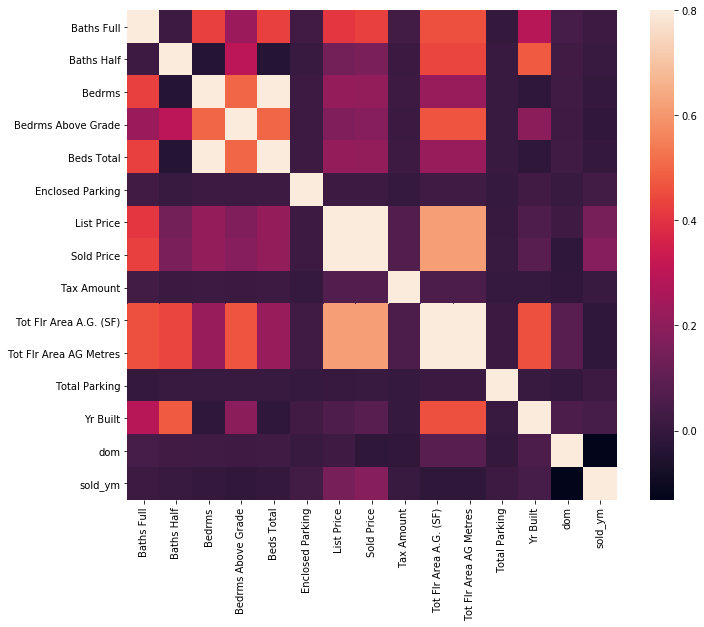

In [15]:
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns
train_num=df_train[numerical_features]
corrmat = train_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [16]:
train_num.drop(['List Price','Tot Flr Area AG Metres','Beds Total'],axis=1,inplace=True,errors='ignore')

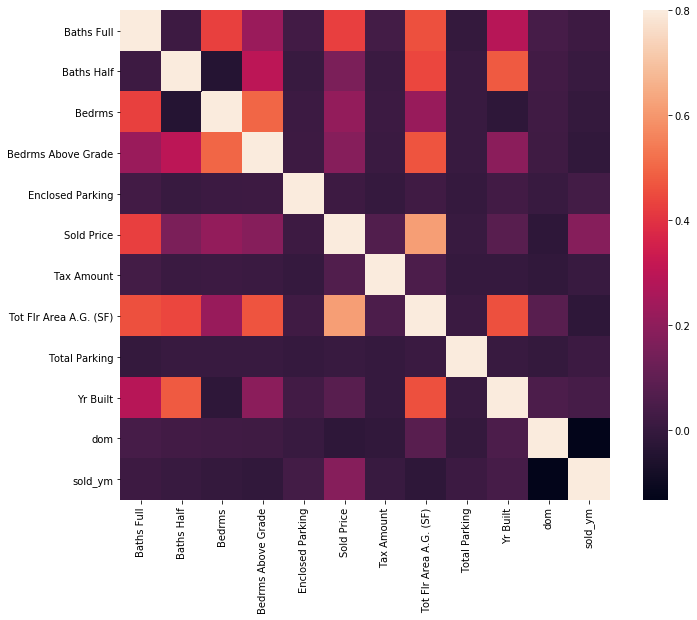

In [17]:

corrmat = train_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

### From the quick view, I found 'Sold Price' may be strongly related to 'Tot Flr Area A.G. ', 'Baths Full', 'Bedrms','sold_ym', 'Bedrms Above Grade', 'Baths Half', 'Yr Built', 'Tax Amount', 'Enclosed Parking'. But it still need further justification.


Index(['Sold Price', 'Tot Flr Area A.G. (SF)', 'Baths Full', 'Bedrms',
       'sold_ym', 'Bedrms Above Grade', 'Baths Half', 'Yr Built', 'Tax Amount',
       'Enclosed Parking'],
      dtype='object')


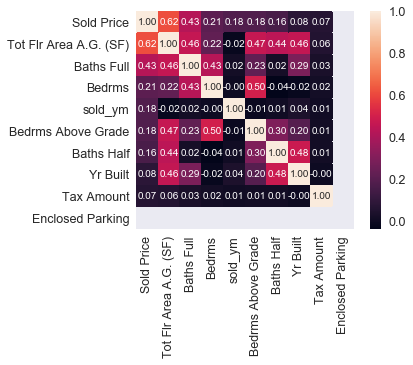

In [18]:

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Sold Price')['Sold Price'].index
print(cols)
cm = np.corrcoef(train_num[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [19]:
# numerical_features = df_train1.select_dtypes(exclude = ["object"]).columns
# train_num=df_train1[numerical_features]
# train_num.columns

In [20]:
# corrmat = train_num.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

### Then I had a detailed look on the categorical features. I used the box plot to figure out the correlation between each feature and 'Sold Price'.

In [21]:
df_train['Basement']=df_train['Basement'].replace(r", See Remarks","")
df_train['Basement']=df_train['Basement'].replace(r"See Remarks","")

# base_dict={None:0, '':0, "Full":3, "Walkout":2, "Part":1, "Crawl Space, Part":7, "Full, Walkout":5, "Crawl Space, Full":9,
#           "Crawl Space":6}
# df_train['Basement']= df_train['Basement'].map(base_dict).astype(float)
# df_train['Basement']


(-0.5, 8.5, 9.6158721445288897, 13.805461232211272)

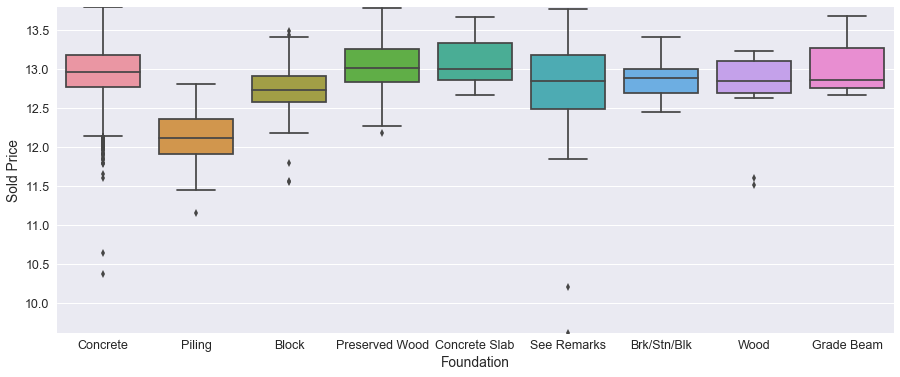

In [22]:
var = 'Foundation'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

(-0.5, 7.5, 9.6158721445288897, 13.805461232211272)

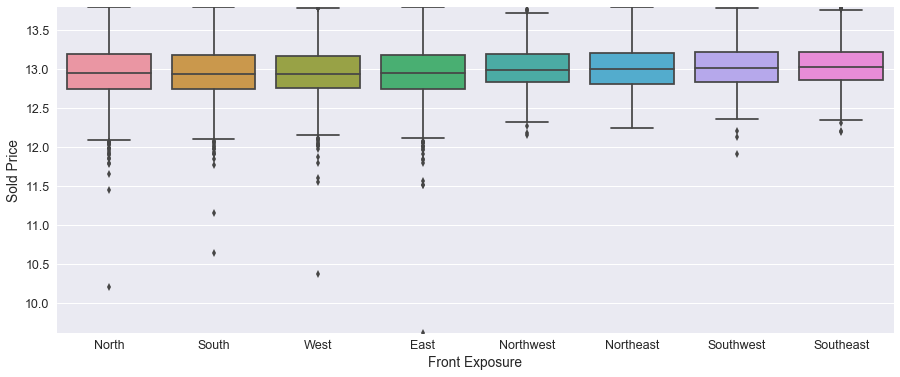

In [23]:
var = 'Front Exposure'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

In [24]:
# dm = pd.get_dummies(train_cat[['Foundation']],dummy_na=False,drop_first=True)
# # df_train1 = df_train.drop(['Amenities','Roof Type','Foundation','Front Exposure','Property Type','Zone','Style','Parking'],axis=1)
# df_train1 = pd.concat([df_train['Sold Price'],dm],axis=1)
# print(df_train1.columns)
# print("Remaining NAs for  features in train : " + str(df_train1.isnull().values.sum()))

(-0.5, 12.5, 9.6158721445288897, 13.805461232211272)

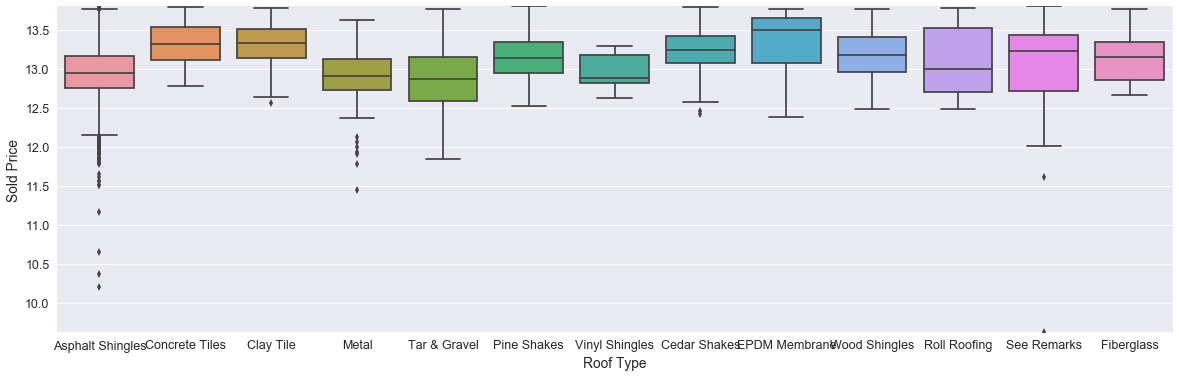

In [25]:
var = 'Roof Type'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

(-0.5, 2.5, 9.6158721445288897, 13.805461232211272)

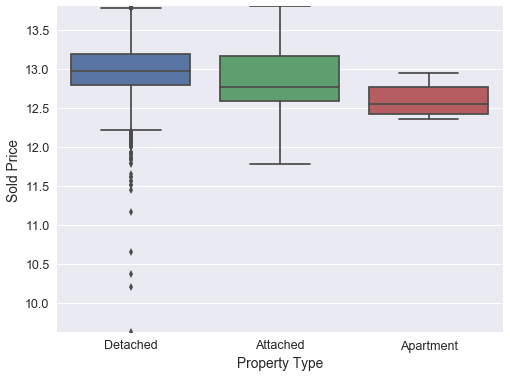

In [26]:
var = 'Property Type'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

(-0.5, 7.5, 9.6158721445288897, 13.805461232211272)

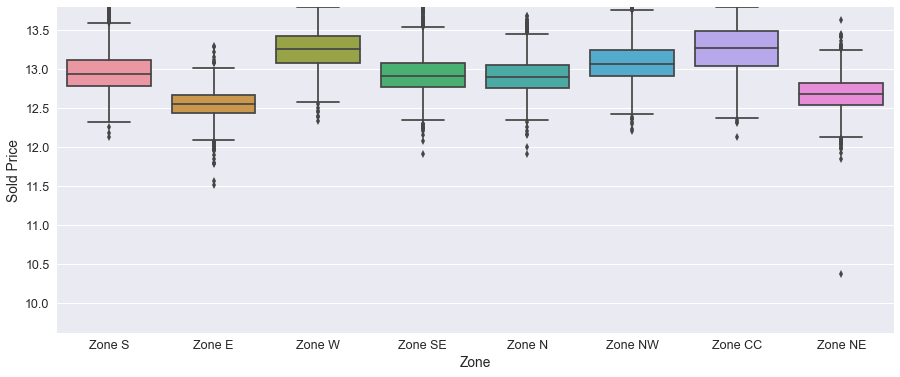

In [27]:
var = 'Zone'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

(-0.5, 16.5, 9.6158721445288897, 13.805461232211272)

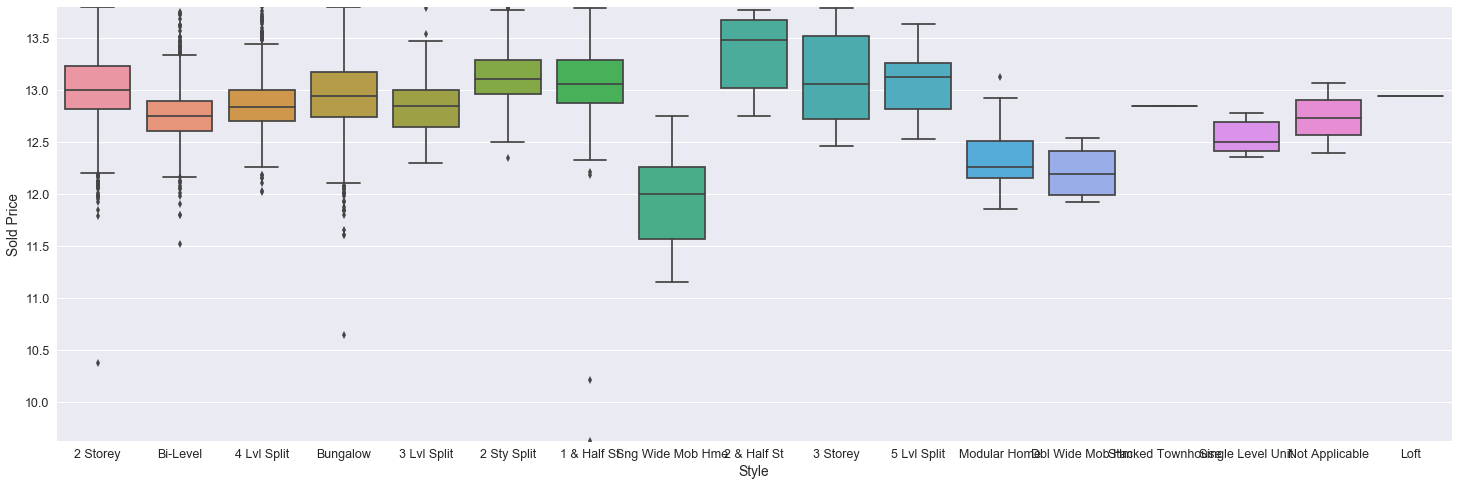

In [28]:
var = 'Style'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

(-0.5, 600.5, 9.6158721445288897, 13.805461232211272)

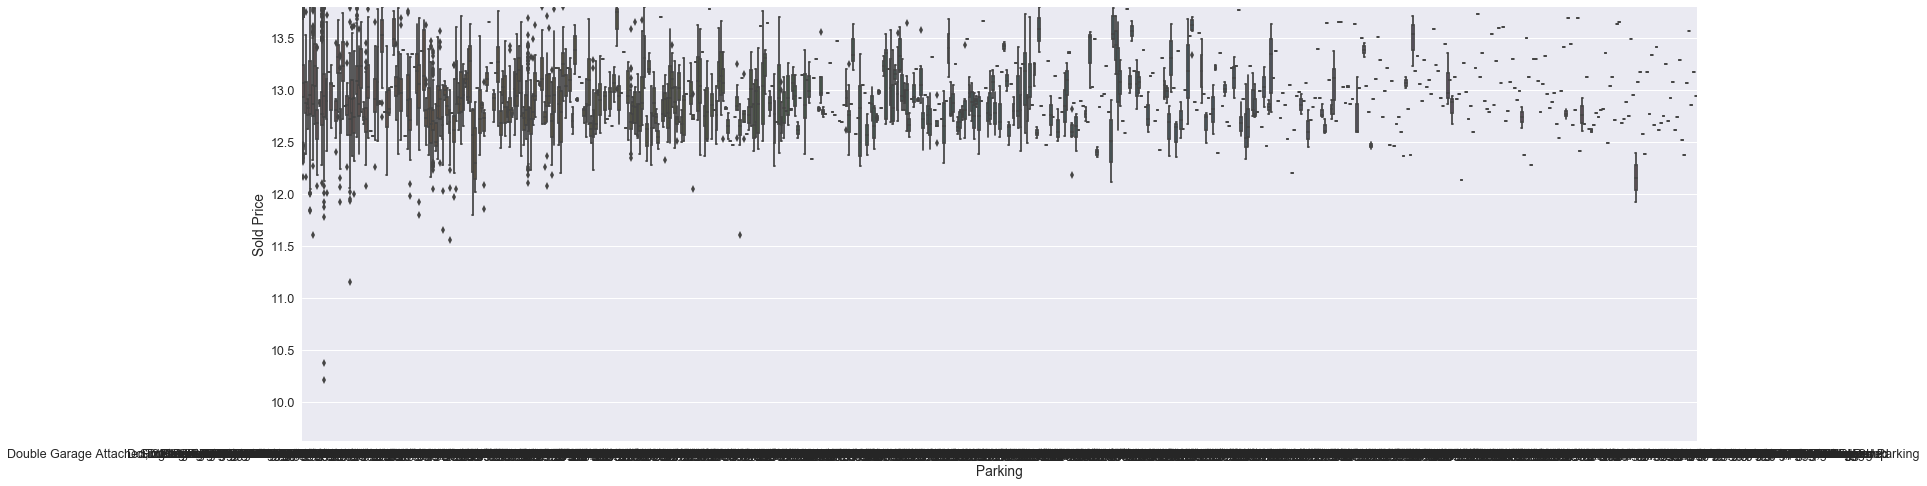

In [29]:
var = 'Parking'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

(-0.5, 30.5, 9.6158721445288897, 13.805461232211272)

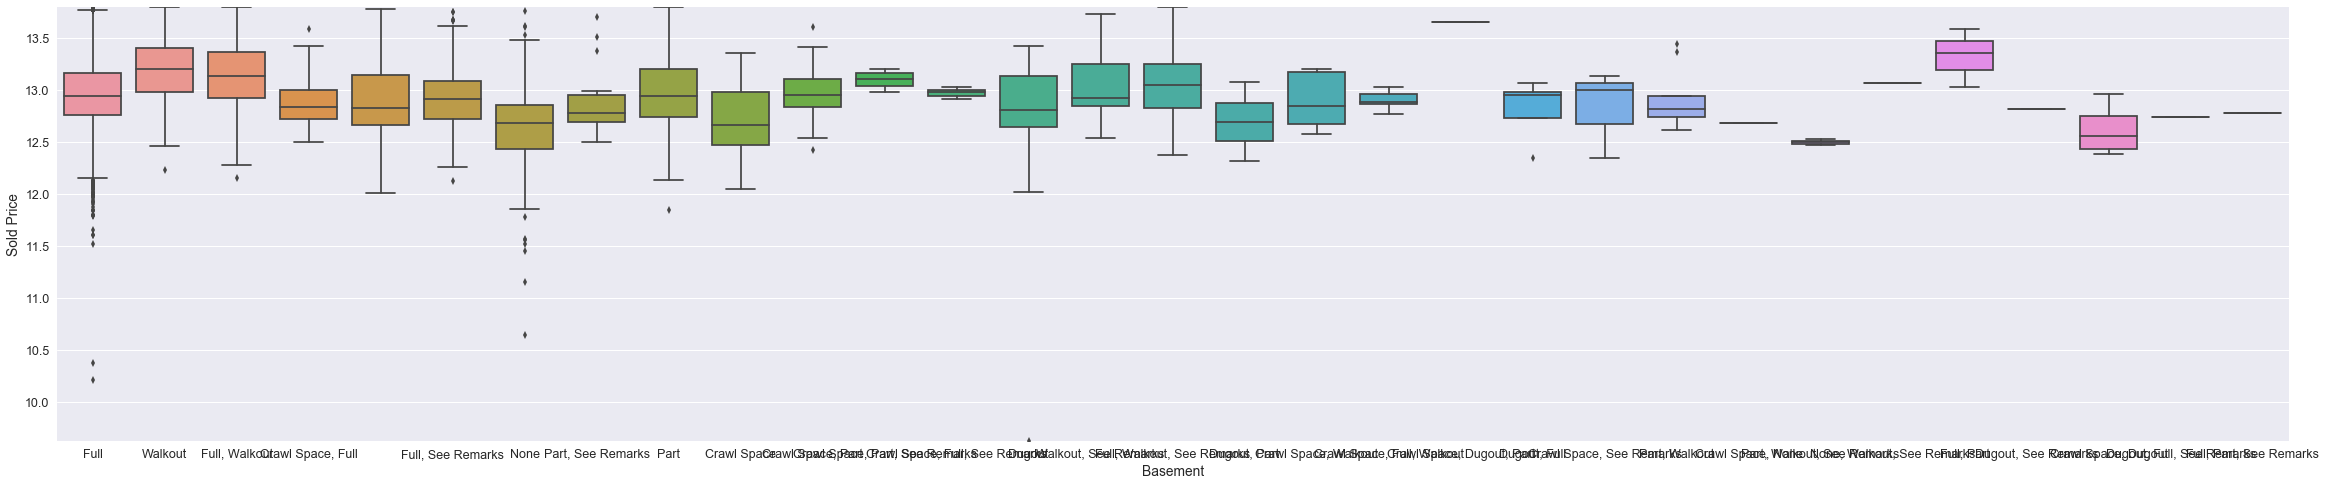

In [30]:
var = 'Basement'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(40, 8))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

(-0.5, 14.5, 9.6158721445288897, 13.805461232211272)

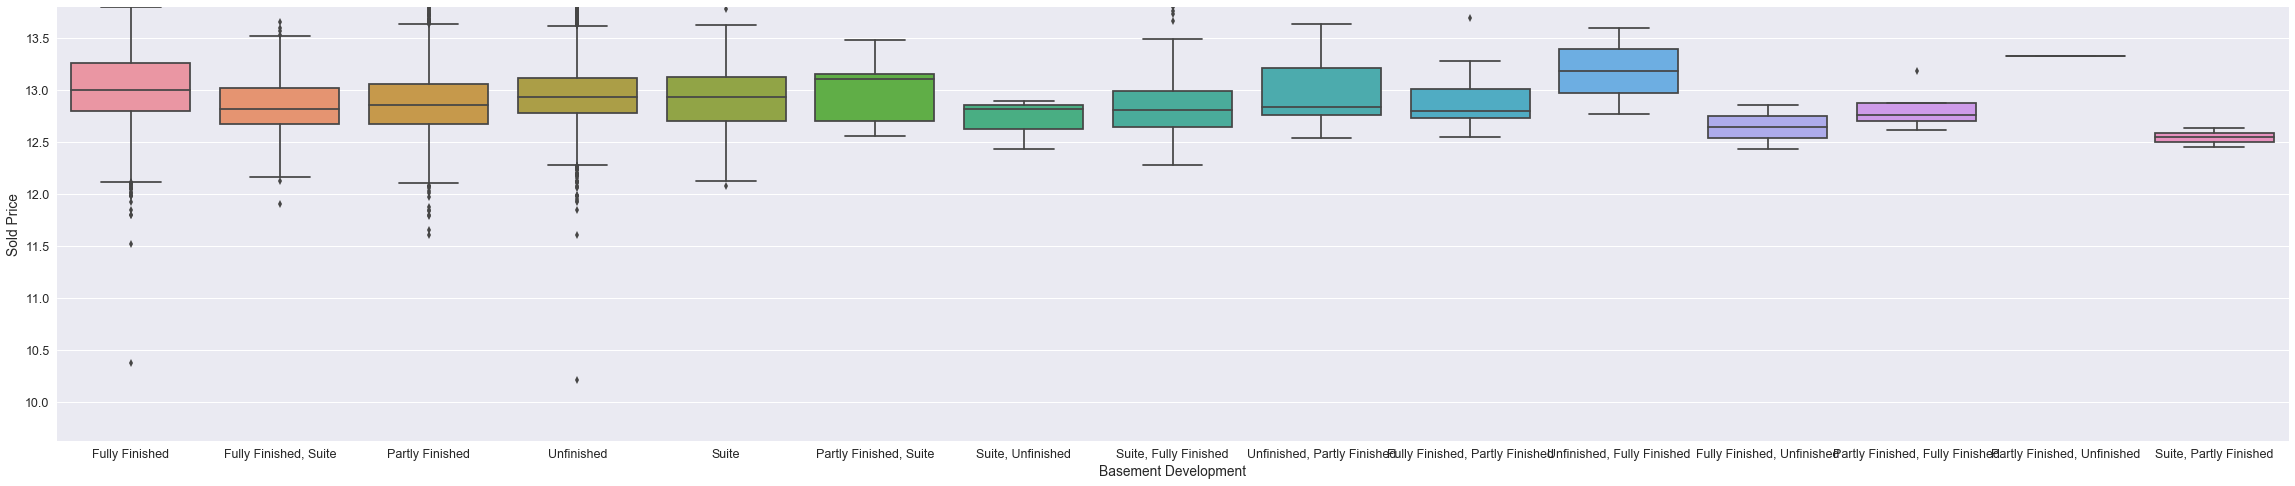

In [31]:
var = 'Basement Development'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(40, 8))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

(-0.5, 40.5, 9.6158721445288897, 13.805461232211272)

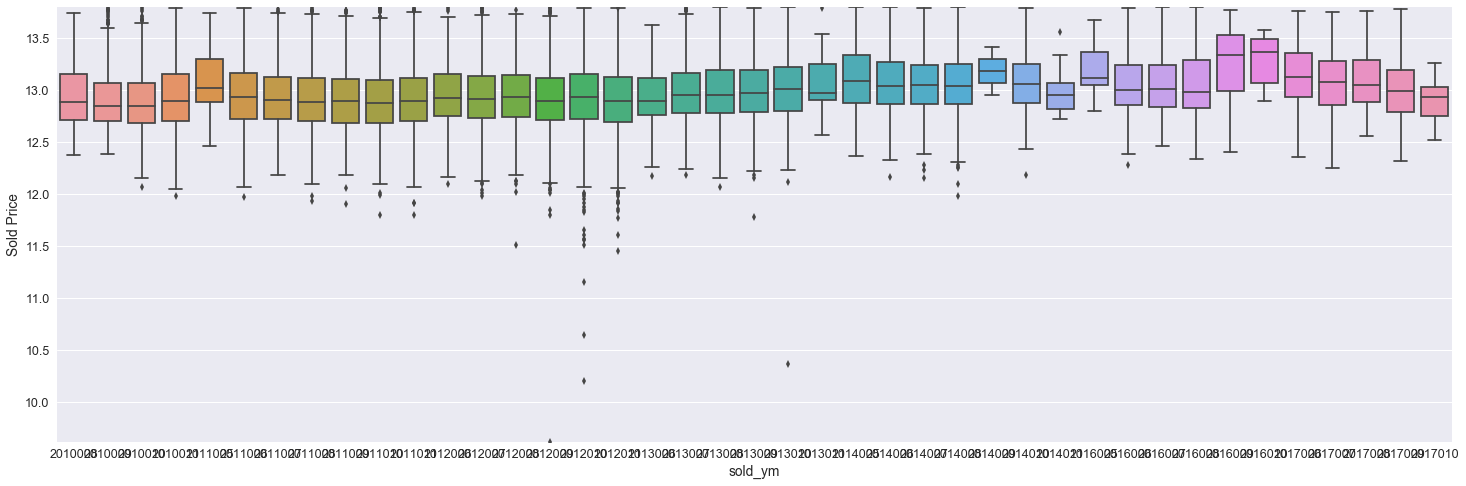

In [32]:
var = 'sold_ym'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

(-0.5, 17.5, 9.6158721445288897, 13.805461232211272)

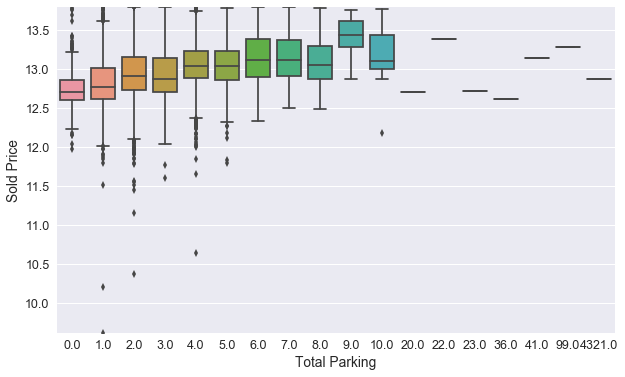

In [33]:
var = 'Total Parking'
data = pd.concat([df_train['Sold Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="Sold Price", data=data)
fig.axis(ymin=np.min(df_train['Sold Price']), ymax=np.max(df_train['Sold Price']))

## 3. Data Modelling

### After the preprocessing and rough calculation, I selected all numeric features and some categorical features which seem to have an impact on house sold price. 

### I used Log Transform of the skewed numerical features to lessen the impact of outliers , filled all missing values with the median and standardize  the numerical values.

### For categorical features, I selected  'Foundation','Zone','Roof Type','Property Type','Style','Parking','Basement','Total Parking' according to the exploration with box plots before and create dummy variables for them.

In [34]:


#log transform skewed numeric features:

numerical_features = df_train.select_dtypes(exclude = ["object"]).columns
train_num=df_train[numerical_features].drop(['day_sold','Sold Price','List Price','Tot Flr Area AG Metres'],axis=1)

train_num = train_num.fillna(train_num.median())
skewed_feats = train_num.apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[abs(skewed_feats) > 0.5]

skewed_feats = skewed_feats.index
print(skewed_feats)

df_train[skewed_feats] = np.log1p(df_train[skewed_feats])


Index(['Bedrms Above Grade', 'Enclosed Parking', 'Tax Amount',
       'Tot Flr Area A.G. (SF)', 'Total Parking', 'Yr Built', 'dom',
       'sold_ym'],
      dtype='object')


In [35]:

df_train[skewed_feats]=df_train[skewed_feats].fillna(df_train[skewed_feats].median())
print("Remaining NAs for numerical features in train : " + str(df_train[skewed_feats].isnull().values.sum()))

Remaining NAs for numerical features in train : 0


In [36]:
from sklearn.preprocessing import StandardScaler
stdSc = StandardScaler()
df_train[skewed_feats]=stdSc.fit_transform(df_train[skewed_feats])

In [37]:
df_train[skewed_feats].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20330 entries, 10 BRIDLECREEK, Calgary, Alberta T2Y 3N7 to Hiwa 24 cross Bow River turn left RR252A go 2 kil., Rural Wheatland County, Alberta T0J 0M0
Data columns (total 8 columns):
Bedrms Above Grade        20330 non-null float64
Enclosed Parking          20330 non-null float64
Tax Amount                20330 non-null float64
Tot Flr Area A.G. (SF)    20330 non-null float64
Total Parking             20330 non-null float64
Yr Built                  20330 non-null float64
dom                       20330 non-null float64
sold_ym                   20330 non-null float64
dtypes: float64(8)
memory usage: 2.0+ MB


In [38]:
df_train1 = pd.concat([df_train[['Foundation','Zone','Roof Type','Property Type','Style','Parking','Basement','Total Parking']],df_train[skewed_feats]],axis=1)

In [78]:
df_train1.columns

Index(['Total Parking', 'Bedrms Above Grade', 'Enclosed Parking', 'Tax Amount',
       'Tot Flr Area A.G. (SF)', 'Total Parking', 'Yr Built', 'dom', 'sold_ym',
       'Foundation_Block',
       ...
       'Basement_Full, Walkout', 'Basement_Full, Walkout, See Remarks',
       'Basement_None', 'Basement_None, Walkout, See Remarks', 'Basement_Part',
       'Basement_Part, See Remarks', 'Basement_Part, Walkout',
       'Basement_Part, Walkout, See Remarks', 'Basement_Walkout',
       'Basement_Walkout, See Remarks'],
      dtype='object', length=691)

In [39]:
df_train1 = pd.get_dummies(df_train1)
df_train1 = df_train1.fillna(df_train1.mean())

### I splited the whole dataset into 70% for model training and 30% for test.
### Linear regression is a common way for predictive modeling.  It not only shows how significant is the relationship between the target value  with predictor values but  also helps to understand the level of impact between the multiple predictor variables to the target variable. I analyzed with simple linear regression model, Ridge(L2 penalty), Lasso(L1 penalty) and ElasticNet model and used RMSE for error measure.
### As the calculated results shown below,  simple linear regression has a huge error while the 3 regularized regression models have  very small RMSE values . The very small difference in RMSE between training and test results indicates that most of the overfitting is eliminated after regularization.
### ElasticNet is a compromise between Ridge and Lasso regression. It has a L1 penalty to generate sparsity and a L2 penalty to overcome some of the limitations of Lasso. According to the optimal L1 ratio(0.085) used by ElasticNet, which is close to 0. It means the ElasticNet nearly equal to our Ridge regressor. The model doesn't need  L1 regularization to overcome potential L2 shortcoming.
## 4. Conclusion
### Based on features engineering and models comaprison, I finally recommend the Ridge Regression for housing value and take features Zone, Total Floor Area, Style, Parking Style and Property Type into the model. The detailed coefficients of each variables were shown in the table below.

Features |  Coefficient 
---------|------------
Style_Sng Wide Mob Hme          |                                 -0.019478
Foundation_Piling               |                                -0.016626
Foundation_Wood                 |                                  -0.015502
Basement_Dugout                 |                                 -0.009750
Parking_Single Garage Attached, Insulated, Front Drive Access|    -0.007676
Basement_Dugout, Part                                      |      -0.007588
Parking_Stall, Rear Drive Access                           |      -0.007583
Parking_2 Outdoor Stalls, Parking Pad Gravel               |      -0.007477
Zone_Zone E                                                |     -0.006531
Parking_Single Garage Attached, Front Drive Access, RV Parking |  -0.006513
Style_Bungalow                                             |       0.008870
Parking_Triple Garage Detached                       |             0.009858
Parking_Single Garage Attached, Single Garage Detached      |      0.010521
Parking_Triple Garage Attached                               |     0.010750
Zone_Zone S                                                  |     0.011055
Style_Not Applicable                                          |    0.013749
Tot Flr Area A.G. (SF)                                         |   0.015243
Zone_Zone NW                                                    |  0.015621
Zone_Zone W                                                      | 0.024205
Zone_Zone CC                                                      |0.036304

### In my Ridge Regression, the result indicates that the total floor area postively affects the sold price. And the zone of the house has both postive and negative influence on the sold price. Among these, Zone CC shows the most significantly postive correlation with sold price, which is easy to understand that the  district which would allow businesses which provide convenient goods and service will be valued higher.  In addition, the parking construction and  housing styles also have impacts on house price to different extents. What's more, the dugout basement, piling and wood foundation seem to negatively influence house value.

## 5. Further work
### Due to the time limitation, I just filtered out several categorical features  and  proposed my model. There might be some useful information in 'community', 'site influence', 'base description' and 'rooms (type and size)', but due to the complicated text messages, we need more time for mining and exploration for these features. 


In [40]:
from sklearn.model_selection import train_test_split
df_train['Sold Price']=df_train['Sold Price'].fillna(df_train['Sold Price'].mean())
df_train['Sold Price']=np.log1p(df_train['Sold Price'])
y = df_train['Sold Price']
X_train, X_test, y_train, y_test = train_test_split(df_train1, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))
# print(y.head(10))

X_train : (14231, 691)
X_test : (6099, 691)
y_train : (14231,)
y_test : (6099,)


In [41]:

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

scorer = make_scorer(mean_squared_error, greater_is_better = False)

# define a function that returns the cross-validation rmse error so we can evaluate our models
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)


RMSE on Training set : 2264820.11044
RMSE on Test set : 7925331.74127


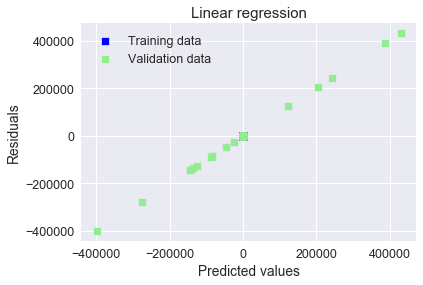

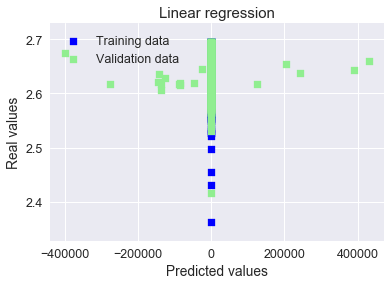

In [42]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
# plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Linear picked 691 features and eliminated the other 0 features


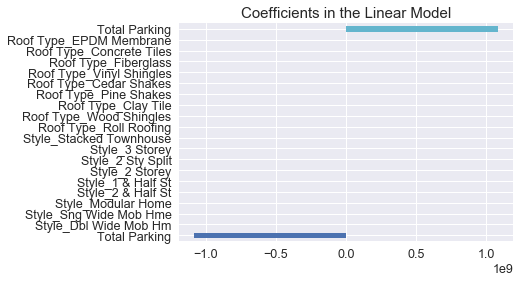

In [43]:
coefs = pd.Series(lr.coef_, index = X_train.columns)
print("Linear picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs ==0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Linear Model")
plt.show()

In [44]:
# 2* Ridge

# alpha : a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit.
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)



Best alpha : 6.0
Try again for more precision with alphas centered around 6.0
Best alpha : 5.4


In [45]:
print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())

Ridge RMSE on Training set : 0.0112136576711
Ridge RMSE on Test set : 0.0106196334833


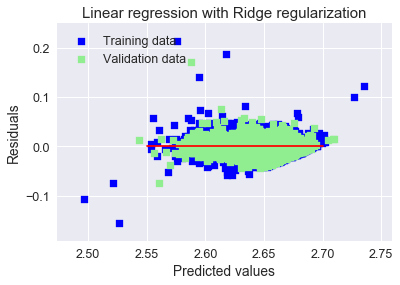

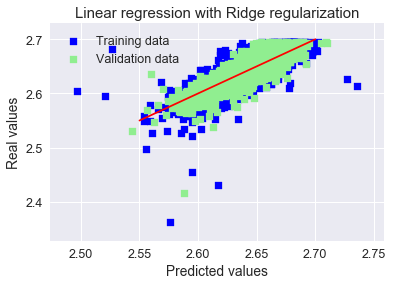

In [65]:
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.plot([2.55, 2.7], [0, 0], c = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2.55, 2.7], [2.55, 2.7], c = "red")
plt.show()


Ridge picked 588 features and eliminated the other 103 features


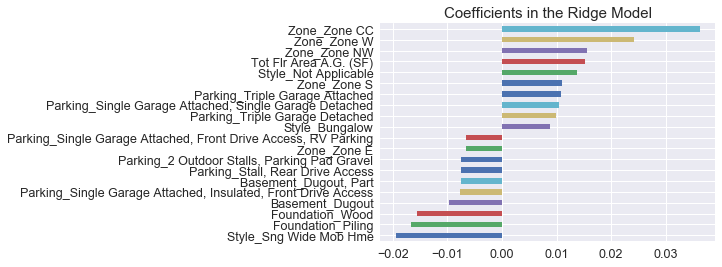

Style_Sng Wide Mob Hme                                           -0.019478
Foundation_Piling                                                -0.016626
Foundation_Wood                                                  -0.015502
Basement_Dugout                                                  -0.009750
Parking_Single Garage Attached, Insulated, Front Drive Access    -0.007676
Basement_Dugout, Part                                            -0.007588
Parking_Stall, Rear Drive Access                                 -0.007583
Parking_2 Outdoor Stalls, Parking Pad Gravel                     -0.007477
Zone_Zone E                                                      -0.006531
Parking_Single Garage Attached, Front Drive Access, RV Parking   -0.006513
Style_Bungalow                                                    0.008870
Parking_Triple Garage Detached                                    0.009858
Parking_Single Garage Attached, Single Garage Detached            0.010521
Parking_Triple Garage Att

In [60]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
ridge_imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
ridge_imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()
print(ridge_imp_coefs)

In [48]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05


In [49]:
print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())

Lasso RMSE on Training set : 0.011553265833
Lasso RMSE on Test set : 0.0109063672909


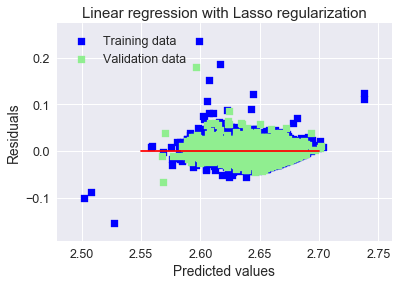

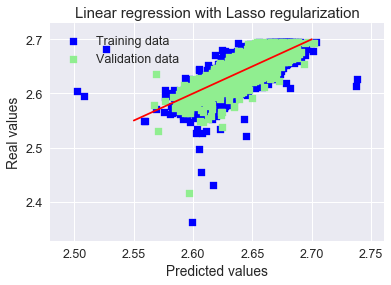

Lasso picked 31 features and eliminated the other 660 features


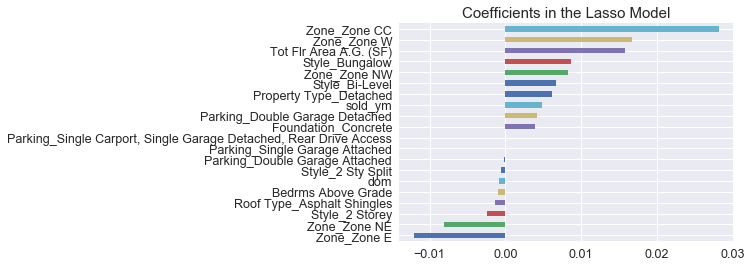

In [64]:
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.plot([2.55, 2.7], [0, 0], c = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2.55, 2.7], [2.55, 2.7], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs1 = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs1.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()


In [51]:
print(imp_coefs1)

Zone_Zone E                                                         -0.012017
Zone_Zone NE                                                        -0.008099
Style_2 Storey                                                      -0.002478
Roof Type_Asphalt Shingles                                          -0.001315
Bedrms Above Grade                                                  -0.000911
dom                                                                 -0.000798
Style_2 Sty Split                                                   -0.000591
Parking_Double Garage Attached                                      -0.000119
Parking_Single Garage Attached                                      -0.000002
Parking_Single Carport, Single Garage Detached, Rear Drive Access    0.000000
Foundation_Concrete                                                  0.003915
Parking_Double Garage Detached                                       0.004232
sold_ym                                                         

In [52]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.1
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.0001
Best l1_ratio : 0.085
Best alpha : 6e-05


In [53]:
print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())

ElasticNet RMSE on Training set : 0.0112320041079
ElasticNet RMSE on Test set : 0.0106106206038


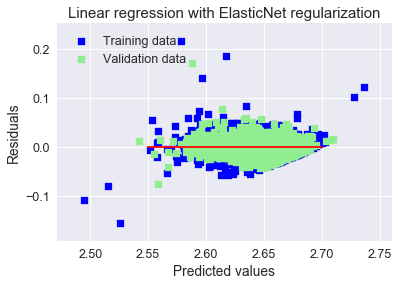

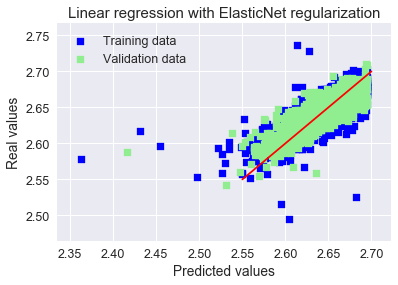

ElasticNet picked 103 features and eliminated the other 588 features


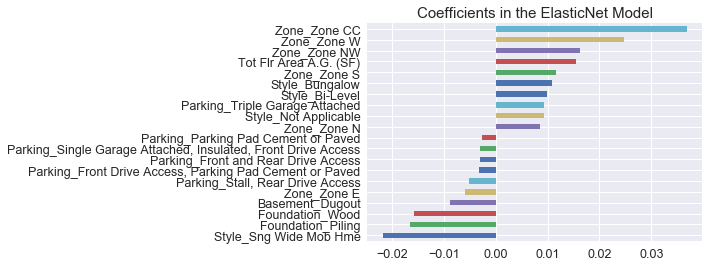

In [67]:
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.plot([2.55, 2.7], [0, 0], c = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2.55, 2.7], [2.55, 2.7], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [55]:
print(imp_coefs)

Style_Sng Wide Mob Hme                                          -0.021842
Foundation_Piling                                               -0.016532
Foundation_Wood                                                 -0.015887
Basement_Dugout                                                 -0.008812
Zone_Zone E                                                     -0.005938
Parking_Stall, Rear Drive Access                                -0.005267
Parking_Front Drive Access, Parking Pad Cement or Paved         -0.003302
Parking_Front and Rear Drive Access                             -0.003068
Parking_Single Garage Attached, Insulated, Front Drive Access   -0.002974
Parking_Parking Pad Cement or Paved                             -0.002721
Zone_Zone N                                                      0.008572
Style_Not Applicable                                             0.009233
Parking_Triple Garage Attached                                   0.009239
Style_Bi-Level                        